In [355]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
import scipy.stats as stats
import sklearn as sk
import statsmodels as sm

from datetime import datetime as dt
from datetime import datetime as date

import warnings
warnings.filterwarnings("ignore")

In [356]:
train=pd.read_csv('Walmart_Store_Sales.csv')

In [357]:
train.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [358]:
train.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [359]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [360]:
train['Weekly_Sales'].isnull().sum()

0

In [361]:
train.shape

(6435, 8)

In [362]:
train.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [363]:
train['Date'] = pd.to_datetime(train['Date'])

In [364]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [365]:
train.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [366]:
train['DateType'] = [dt.strptime(date, '%Y-%m-%d').date() for date in train['Date'].astype(str).values.tolist()]

In [367]:
train['Superbowl'] =    np.where((train['DateType']==dt(2010, 2, 12).date())  | (train['DateType']==dt(2011, 2, 11).date()) | (train['DateType']==dt(2012, 2, 10).date()) | (train['DateType']==dt(2013, 2, 8).date()),1, 0)
train['Labor_Day'] =    np.where((train['DateType']==dt(2010, 9, 10).date())  | (train['DateType']==dt(2011, 9, 9).date())  | (train['DateType']==dt(2012, 9 , 7).date()) | (train['DateType']==dt(2013, 9, 6).date()),1, 0)
train['Christmas'] =    np.where((train['DateType']==dt(2010, 12, 31).date()) | (train['DateType']==dt(2011, 12, 30).date())| (train['DateType']==dt(2012, 12, 28).date())| (train['DateType']==dt(2013, 12, 27).date()),1, 0)
train['Thanksgiving'] = np.where((train['DateType']==dt(2010, 11, 26).date()) | (train['DateType']==dt(2011, 11, 25).date())| (train['DateType']==dt(2012, 11, 23).date())| (train['DateType']==dt(2013, 11, 29).date()),1, 0)

In [368]:
print(train.Superbowl.value_counts())
print(train.Labor_Day.value_counts())
print(train.Thanksgiving.value_counts())
print(train.Christmas.value_counts())

0    6435
Name: Superbowl, dtype: int64
0    6390
1      45
Name: Labor_Day, dtype: int64
0    6345
1      90
Name: Thanksgiving, dtype: int64
0    6345
1      90
Name: Christmas, dtype: int64


### Q1.Which store has maximum sales ?

In [369]:
store_sales=train.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)

In [370]:
round(store_sales,1)

Store
20    301397792.5
4     299543953.4
14    288999911.3
13    286517703.8
2     275382441.0
10    271617713.9
27    253855916.9
6     223756130.6
1     222402808.9
39    207445542.5
19    206634862.1
31    199613905.5
23    198750617.8
24    194016021.3
11    193962786.8
28    189263680.6
41    181341934.9
32    166819246.2
18    155114734.2
22    147075648.6
12    144287230.1
26    143416393.8
34    138249763.0
40    137870309.8
35    131520672.1
8     129951181.1
17    127782138.8
45    112395341.4
21    108117878.9
25    101061179.2
43     90565435.4
15     89133683.9
7      81598275.1
42     79565752.4
9      77789219.0
29     77141554.3
16     74252425.4
37     74202740.3
30     62716885.1
3      57586735.1
38     55159626.4
36     53412215.0
5      45475688.9
44     43293087.8
33     37160222.0
Name: Weekly_Sales, dtype: float64

### So, the Store 20 Has maximum sales 

**************************************************************************************

### Q2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [371]:
store_std =train.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending=False)

In [372]:
round(store_std,2)

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
23    249788.04
27    239930.14
2     237683.69
39    217466.45
6     212525.86
35    211243.46
19    191722.64
41    187907.16
28    181758.97
18    176641.51
24    167745.68
11    165833.89
22    161251.35
1     155980.77
12    139166.87
32    138017.25
45    130168.53
21    128752.81
31    125855.94
15    120538.65
40    119002.11
25    112976.79
7     112585.47
17    112162.94
26    110431.29
8     106280.83
34    104630.16
29     99120.14
16     85769.68
9      69028.67
36     60725.17
42     50262.93
3      46319.63
38     42768.17
43     40598.41
5      37737.97
44     24762.83
33     24132.93
30     22809.67
37     21837.46
Name: Weekly_Sales, dtype: float64

In [373]:
store_mean =train.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending=False)

In [374]:
cv = round(store_std/store_mean,2)

In [375]:
cv.sort_values(ascending=False)

Store
35    0.23
7     0.20
15    0.19
23    0.18
29    0.18
16    0.17
21    0.17
45    0.17
10    0.16
14    0.16
25    0.16
18    0.16
36    0.16
22    0.16
41    0.15
39    0.15
12    0.14
6     0.14
28    0.14
27    0.14
19    0.13
20    0.13
13    0.13
17    0.13
9     0.13
4     0.13
40    0.12
8     0.12
24    0.12
3     0.12
32    0.12
2     0.12
11    0.12
5     0.12
26    0.11
34    0.11
38    0.11
1     0.10
42    0.09
31    0.09
33    0.09
44    0.08
43    0.06
30    0.05
37    0.04
Name: Weekly_Sales, dtype: float64

### Q3. Which store/s has good quarterly growth rate in Q3’2012 

In [376]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Quarter'] = train['Date'].dt.quarter

In [377]:
train.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DateType,Superbowl,Labor_Day,Christmas,Thanksgiving,Year,Month,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,0,0,0,0,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,0,0,0,0,2010,12,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,0,0,0,0,2010,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,0,0,0,0,2010,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,0,0,0,0,2010,5,2


In [378]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   DateType      6435 non-null   object        
 9   Superbowl     6435 non-null   int32         
 10  Labor_Day     6435 non-null   int32         
 11  Christmas     6435 non-null   int32         
 12  Thanksgiving  6435 non-null   int32         
 13  Year          6435 non-null   int64         
 14  Month         6435 non-null   int64         
 15  Quarter       6435 non-null   int64   

In [379]:
train.columns 

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'DateType', 'Superbowl',
       'Labor_Day', 'Christmas', 'Thanksgiving', 'Year', 'Month', 'Quarter'],
      dtype='object')

In [380]:
train.drop(columns= 'DateType',inplace =True)

In [381]:
train.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,Labor_Day,Christmas,Thanksgiving,Year,Month,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,2010,12,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,2010,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,2010,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,2010,5,2


In [382]:
Que3 = train[(train['Quarter'] == 3) & (train['Year'] == 2012)].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending= False )

In [383]:
Que3.head(3)

Store
4     25652119.35
20    24665938.11
13    24319994.35
Name: Weekly_Sales, dtype: float64

In [384]:
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))

#Collecting the data of Q3 and Q2 from original dataset.
Q2data=train[(train['Date'] > Q2_date_from) & (train['Date'] < Q2_date_to)]
Q3data=train[(train['Date'] > Q3_date_from) & (train['Date'] < Q3_date_to)]

#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)

#finding the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

# Growth rate formula is defined as the ratio of difference in present value to past value by past value whole multiplied with 100 (since it is in percentage)
# ((Present value — Past value )/Past value )*100
#Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [385]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


#### From above tables we can infer that Q3 growth rate is in losses .
#### the Store 16 has the least loss of 3% compared the other stores and store 14 has highest loss of 18%.

_______________________________________________________________________________________________________

### Q4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

#### Holiday Events:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [386]:
round(train.groupby(['Holiday_Flag'])['Weekly_Sales'].sum(),2)

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

In [387]:
Spr_sales = train.groupby(['Superbowl'])['Weekly_Sales'].mean()
print(round(Spr_sales,2))
Ld_sales = train.groupby(['Labor_Day'])['Weekly_Sales'].mean()
print(round(Ld_sales,2))
Thanksg_sales = train.groupby(['Thanksgiving'])['Weekly_Sales'].mean()
print(round(Thanksg_sales,2))
Christmas_sales = train.groupby(['Christmas'])['Weekly_Sales'].mean()
print(round(Christmas_sales,2))
Non_Holi_Sales = train[(train['Holiday_Flag'] == 0)].groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(round(Non_Holi_Sales,2))

Superbowl
0    1046964.88
Name: Weekly_Sales, dtype: float64
Labor_Day
0    1047019.68
1    1039182.83
Name: Weekly_Sales, dtype: float64
Thanksgiving
0    1040946.32
1    1471273.43
Name: Weekly_Sales, dtype: float64
Christmas
0    1048186.60
1     960833.11
Name: Weekly_Sales, dtype: float64
Holiday_Flag
0    1041256.38
Name: Weekly_Sales, dtype: float64


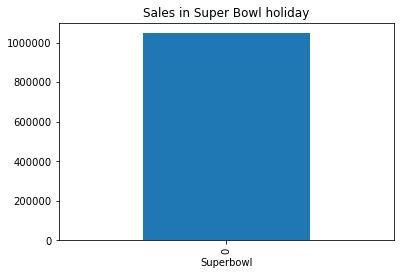

In [388]:
Spr_sales.plot(kind='bar',legend=False,title='Sales in Super Bowl holiday') 

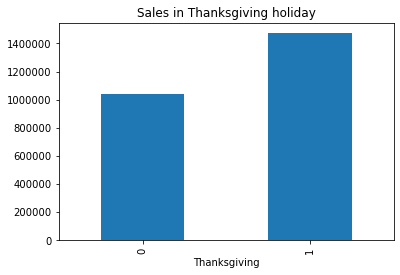

In [389]:
Thanksg_sales.plot(kind='bar',legend=False,title='Sales in Thanksgiving holiday') 

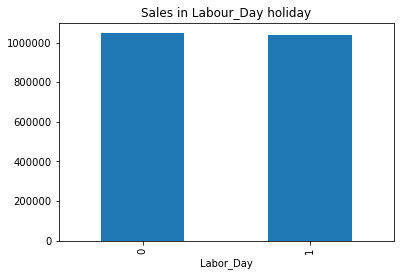

In [390]:
Ld_sales.plot(kind='bar',legend=False,title='Sales in Labour_Day holiday')

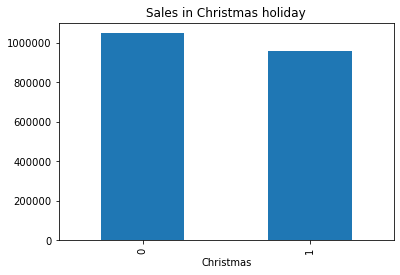

In [391]:
Christmas_sales.plot(kind='bar',legend=False,title='Sales in Christmas holiday')

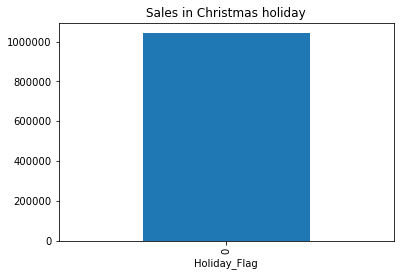

In [392]:
Non_Holi_Sales.plot(kind='bar',legend=False,title='Sales in Christmas holiday')

_______________________________________________________________________________________________________________________________

### Q5. Provide a monthly and semester view of sales in units and give insights

Text(0, 0.5, 'Weekly_Sales')

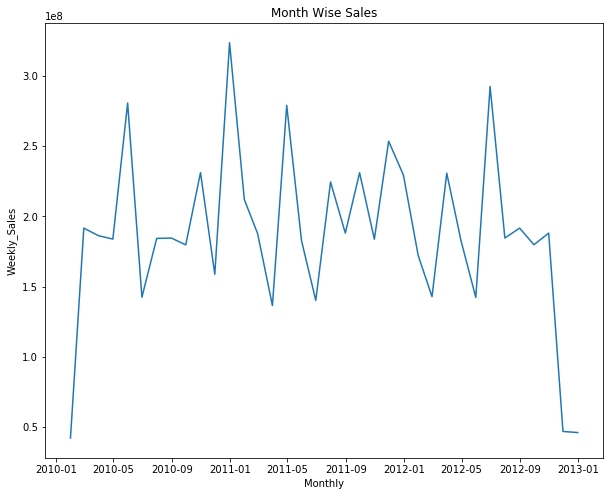

In [393]:
monthly = train.groupby(pd.Grouper(key='Date', freq='1M')).sum()
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

Text(0, 0.5, 'Weekly_Sales')

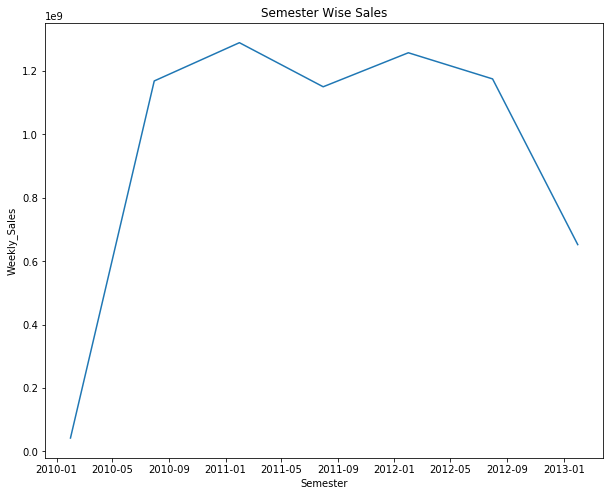

In [394]:
Semester = train.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

In [395]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Superbowl     6435 non-null   int32         
 9   Labor_Day     6435 non-null   int32         
 10  Christmas     6435 non-null   int32         
 11  Thanksgiving  6435 non-null   int32         
 12  Year          6435 non-null   int64         
 13  Month         6435 non-null   int64         
 14  Quarter       6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int3

In [396]:
train['Date'].sort_values()

606    2010-01-10
2036   2010-01-10
5897   2010-01-10
4610   2010-01-10
5039   2010-01-10
          ...    
5860   2012-12-10
2285   2012-12-10
1427   2012-12-10
3572   2012-12-10
283    2012-12-10
Name: Date, Length: 6435, dtype: datetime64[ns]

In [397]:
train.drop(columns=['Superbowl','Labor_Day','Christmas','Thanksgiving'],inplace = True)

In [398]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [399]:
train['Store']

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

In [400]:
train['Store'] = train.Store.astype(str)
train['Store'] = 'Store '+ train.Store.astype(str)

In [401]:
train['Store']

0        Store 1
1        Store 1
2        Store 1
3        Store 1
4        Store 1
          ...   
6430    Store 45
6431    Store 45
6432    Store 45
6433    Store 45
6434    Store 45
Name: Store, Length: 6435, dtype: object

In [402]:
LabEncoder = LabelEncoder()
Str_1 = train[train['Store']=='Store 1']
Str_1 = Str_1.copy()

In [403]:
Str_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,Store 1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,Store 1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,4
2,Store 1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,Store 1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,Store 1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,2


In [404]:
Str_1['Days'] = LabEncoder.fit_transform(Str_1['Date'])
Str_1.drop(['Store','Date','Holiday_Flag','Year','Month','Quarter'],axis=1 , inplace = True)

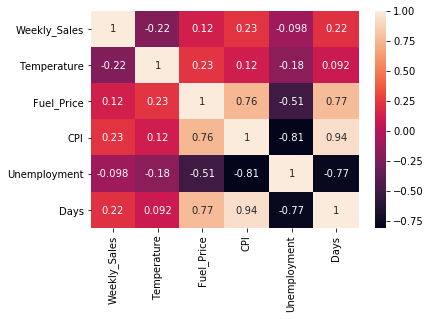

In [405]:
corr = Str_1.corr()
corrmat = sns.heatmap(Str_1.corr(), annot=True)
corrmat

As we can see unemployment is highly correlated with days and is insignificant as it correlation with Weekly Sales is quite low.
Also temperature and Unemployment are negatively impacting the sales . however Fuel Price and CPI are positively impacting the Sales.

In [406]:
X = Str_1[['Days','Fuel_Price','CPI','Unemployment']]
y = Str_1['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 123)

In [407]:
print("Shape of X_train is " , X_train.shape)
print("Shape of y_train is " , y_train.shape)

print("Shape of X_test is " , X_test.shape)
print("Shape of y_test is " , y_test.shape)

Shape of X_train is  (114, 4)
Shape of y_train is  (114,)
Shape of X_test is  (29, 4)
Shape of y_test is  (29,)


In [408]:
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

LinearRegression()

In [410]:
y_pred = Linreg.predict(X_test)
print('Accuracy:',Linreg.score(X_train, y_train)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 12.42945819661223
Mean Absolute Error: 104768.40557779407
Mean Squared Error: 21350591361.51661
Root Mean Squared Error: 146118.415545463


In [413]:
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 16.994626831916403
Mean Absolute Error: 80787.81714075142
Mean Squared Error: 15307070216.324408
Root Mean Squared Error: 123721.74512317714


In [414]:
ActPred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": y_pred})
ActPred.head()


,Actual Sales,Predicted Sales
136,1517428.87,1.543458e+06
128,1497954.76,1.512521e+06
114,1621031.70,1.744478e+06
45,1891034.93,1.956002e+06
31,1507460.69,1.508545e+06
